In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 

In [2]:
dados = pd.DataFrame({
    'Substância':["Alcool", "Gasolina", "Leite", "Querosene", "Óleo", "Vinho"],
    'Concentração(%)':[12.5,0.1,4.0,1.2,0.5,15.0],
    'Teor Alcoólico(%)':[50,0.05,0.01,0.02,0.01,12.5],
})

In [4]:
dados.head(6)

,Substância,Concentração(%),Teor Alcoólico(%)
0,Alcool,12.5,50.00
1,Gasolina,0.1,0.05
2,Leite,4.0,0.01
3,Querosene,1.2,0.02
4,Óleo,0.5,0.01
5,Vinho,15.0,12.50


In [6]:
dados = pd.get_dummies(dados, columns=['Substância'])

In [12]:
dados

,Concentração(%),Teor Alcoólico(%),Substância_Alcool,Substância_Gasolina,Substância_Leite,Substância_Querosene,Substância_Vinho,Substância_Óleo
0,12.5,50.00,True,False,False,False,False,False
1,0.1,0.05,False,True,False,False,False,False
2,4.0,0.01,False,False,True,False,False,False
3,1.2,0.02,False,False,False,True,False,False
4,0.5,0.01,False,False,False,False,False,True
5,15.0,12.50,False,False,False,False,True,False


In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dados)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [8]:
KMeans(n_clusters=3)

KMeans(n_clusters=3)

In [9]:
sse = kmeans.inertia_
print('SSE: ',sse)

SSE:  12.291075000000001


In [10]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Text(0, 0.5, 'Teor Alcoólico')

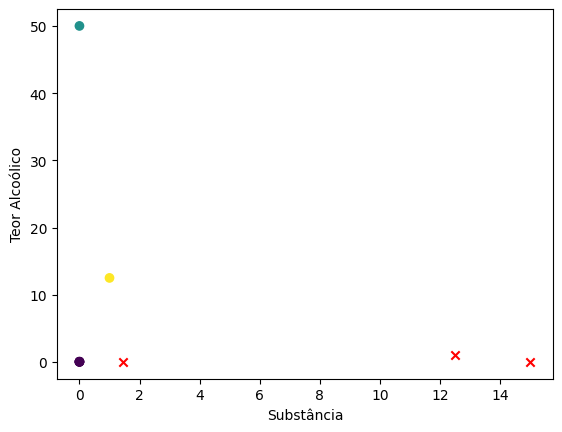

In [14]:
plt.scatter(dados['Substância_Vinho'],dados['Teor Alcoólico(%)'], c= labels) # plota  o gráfico com a visualização dos clusters
plt.scatter(centroids[:, 0], centroids[:, 2], marker='x', color='red')

plt.xlabel("Substância")
plt.ylabel("Teor Alcoólico")

In [15]:
print(labels)
print(centroids)

[1 0 0 0 0 2]
[[1.45e+00 2.25e-02 0.00e+00 2.50e-01 2.50e-01 2.50e-01 0.00e+00 2.50e-01]
 [1.25e+01 5.00e+01 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [1.50e+01 1.25e+01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00]]


In [16]:
print(dados)


   Concentração(%)  Teor Alcoólico(%)  Substância_Alcool  Substância_Gasolina  \
0             12.5              50.00               True                False   
1              0.1               0.05              False                 True   
2              4.0               0.01              False                False   
3              1.2               0.02              False                False   
4              0.5               0.01              False                False   
5             15.0              12.50              False                False   

   Substância_Leite  Substância_Querosene  Substância_Vinho  Substância_Óleo  
0             False                 False             False            False  
1             False                 False             False            False  
2              True                 False             False            False  
3             False                  True             False            False  
4             False                 F

In [17]:
dados

,Concentração(%),Teor Alcoólico(%),Substância_Alcool,Substância_Gasolina,Substância_Leite,Substância_Querosene,Substância_Vinho,Substância_Óleo
0,12.5,50.00,True,False,False,False,False,False
1,0.1,0.05,False,True,False,False,False,False
2,4.0,0.01,False,False,True,False,False,False
3,1.2,0.02,False,False,False,True,False,False
4,0.5,0.01,False,False,False,False,False,True
5,15.0,12.50,False,False,False,False,True,False


In [18]:
dados['Grupo'] = labels
grouped_data = dados.groupby('Grupo').mean()
print(grouped_data)

       Concentração(%)  Teor Alcoólico(%)  Substância_Alcool  \
Grupo                                                          
0                 1.45             0.0225                0.0   
1                12.50            50.0000                1.0   
2                15.00            12.5000                0.0   

       Substância_Gasolina  Substância_Leite  Substância_Querosene  \
Grupo                                                                
0                     0.25              0.25                  0.25   
1                     0.00              0.00                  0.00   
2                     0.00              0.00                  0.00   

       Substância_Vinho  Substância_Óleo  
Grupo                                     
0                   0.0             0.25  
1                   0.0             0.00  
2                   1.0             0.00  
